In [0]:
!wget --no-check-certificate \
   "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
   -O /content/cats-vss-dogs.zip  

--2020-03-04 12:10:49--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 173.222.228.51, 2600:1406:e800:48f::e59, 2600:1406:e800:48e::e59
Connecting to download.microsoft.com (download.microsoft.com)|173.222.228.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/content/cats-vss-dogs.zip’

/content/cats-vss-d 100%[===================>] 786.68M   225MB/s    in 3.5s    

2020-03-04 12:10:53 (224 MB/s) - ‘/content/cats-vss-dogs.zip’ saved [824894548/824894548]



In [0]:
import os
import zipfile
from shutil import copyfile

In [0]:
path='/content/cats-vss-dogs.zip'
zip_ref=zipfile.ZipFile(path,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
print(len(os.listdir('/content/PetImages/Cat/')))
print(len(os.listdir('/content/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [0]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
  os.mkdir('/content/cats-vss-dogs')
  os.mkdir('/content/cats-vss-dogs/training')
  os.mkdir('/content/cats-vss-dogs/testing')
  os.mkdir('/content/cats-vss-dogs/training/cats')
  os.mkdir('/content/cats-vss-dogs/training/dogs')
  os.mkdir('/content/cats-vss-dogs/testing/cats')
  os.mkdir('/content/cats-vss-dogs/testing/dogs')
except OSError:
  pass

In [0]:
import random


In [1]:


def train_test_split(source,train,test,split_size):
  files=[]
  for filename in os.listdir(source):
    file=source+filename
    if(os.path.getsize(file)>0):
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")
  
  train_length=int(split_size*len(files))
  test_length=int(len(files)-train_length)
  shuffle=random.sample(files,len(files))
  training_set=shuffle[0:train_length]
  test_set=shuffle[train_length:len(files)]
  for i in training_set:
    this_files=source+i
    destination=train+i
    copyfile(this_files,destination)
  for i in test_set:
    this_files=source+i
    destination=test+i
    copyfile(this_files,destination)
cats_source='/content/PetImages/Cat/'
dogs_source='/content/PetImages/Dog/'

test_cats_dir='/content/cats-vss-dogs/testing/cats/'
test_dogs_dir='/content/cats-vss-dogs/testing/dogs/'
train_cats_dir='/content/cats-vss-dogs/training/cats/'
train_dogs_dir='/content/cats-vss-dogs/training/dogs/'
split_size=0.9

train_test_split(cats_source,train_cats_dir,test_cats_dir,split_size)
train_test_split(dogs_source,train_dogs_dir,test_dogs_dir,split_size)

NameError: ignored

In [0]:
print(len(os.listdir('/content/cats-vss-dogs/training/cats')))
print(len(os.listdir('/content/cats-vss-dogs/training/dogs')))
print(len(os.listdir('/content/cats-vss-dogs/testing/cats')))
print(len(os.listdir('/content/cats-vss-dogs/testing/dogs')))

11250
11250
1250
1250


In [0]:
import tensorflow as tf


In [0]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(250,250,3)),
                                  tf.keras.layers.MaxPool2D((2,2)), #Max pool 74,74
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'), #72,72
                                  tf.keras.layers.MaxPool2D((2,2)), #36,36
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'), #34,34
                                  tf.keras.layers.MaxPool2D((2,2)),#17,17
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'), #72,72
                                  tf.keras.layers.MaxPool2D((2,2)), #36,36
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 27, 27, 32)       

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1.0/255.)

test_data=ImageDataGenerator(rescale=1.0/255.)

train_generator=train_data.flow_from_directory(
    '/content/cats-vss-dogs/training',
    batch_size=100,
    target_size=(250,250),
    class_mode='binary'
)

test_generator=test_data.flow_from_directory(
    '/content/cats-vss-dogs/testing',
    batch_size=100,
    target_size=(250,250),
    class_mode='binary'
)


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [0]:
history=model.fit_generator(train_generator,
                            epochs=15,
                            verbose=1,
                            validation_data=test_generator)

Epoch 1/15
  4/225 [..............................] - ETA: 1:17 - loss: 0.5208 - acc: 0.7375

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

225/225 [==============================] - 87s 386ms/step - loss: 0.4828 - acc: 0.7682 - val_loss: 0.4453 - val_acc: 0.7912
Epoch 2/15
225/225 [==============================] - 83s 370ms/step - loss: 0.4243 - acc: 0.8057 - val_loss: 0.4172 - val_acc: 0.8152
Epoch 3/15
225/225 [==============================] - 83s 367ms/step - loss: 0.3665 - acc: 0.8381 - val_loss: 0.4049 - val_acc: 0.8184
Epoch 4/15
225/225 [==============================] - 81s 359ms/step - loss: 0.3117 - acc: 0.8659 - val_loss: 0.4487 - val_acc: 0.8096
Epoch 5/15
225/225 [==============================] - 80s 357ms/step - loss: 0.2545 - acc: 0.8964 - val_loss: 0.4067 - val_acc: 0.8396
Epoch 6/15
225/225 [==============================] - 81s 360ms/step - loss: 0.1993 - acc: 0.9199 - val_loss: 0.4890 - val_acc: 0.8268
Epoch 7/15
225/225 [==============================] - 82s 365ms/step - loss: 0.1392 - acc: 0.9471 - val_loss: 0.5880 - val_acc: 0.8272
Epoch 8/15
225/225 [==============================] - 81s 362ms/st

Text(0.5, 1.0, 'Loss')

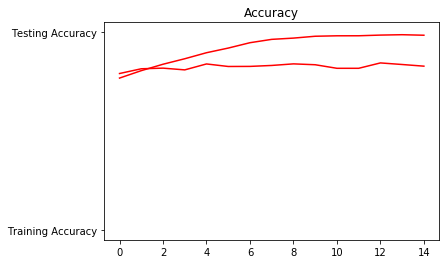

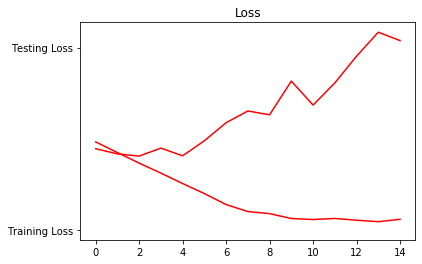

In [0]:
import matplotlib.pyplot as plt
import numpy as np

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs,acc,'r','Training Accuracy')
plt.plot(epochs,val_acc,'r','Testing Accuracy')
plt.title('Accuracy')
plt.figure()
plt.plot(epochs,loss,'r','Training Loss')
plt.plot(epochs,val_loss,'r','Testing Loss')
plt.title('Loss')

In [0]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

upload=files.upload()
for fn in upload:
  path='/content/'+fn
  img=image.load_img(path,target_size=(250,250))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  x=np.vstack([x])
  classes=model.predict(x,batch_size=10)
  if(classes[0]>0.5):
    print(fn+" is a dog")
  else:
    print(fn+" is a cat")

Saving images.jfif to images (3).jfif
Saving Stocksy_txp33a24e10lxw100_Medium_214761-5af9d6d7875db900360440a7.jpg to Stocksy_txp33a24e10lxw100_Medium_214761-5af9d6d7875db900360440a7 (4).jpg
Saving iStock-805170532_absolutimages-668x336.jpg to iStock-805170532_absolutimages-668x336 (3).jpg
Saving vChK6pTy3vN3KbYZ7UU7k3-1024-80.jpg to vChK6pTy3vN3KbYZ7UU7k3-1024-80 (3).jpg
Saving download (3).jfif to download (3) (2).jfif
Saving download (2).jfif to download (2) (2).jfif
Saving download (1).jfif to download (1) (2).jfif
Saving woof_meow.jpg to woof_meow (1).jpg
images.jfif is a dog
Stocksy_txp33a24e10lxw100_Medium_214761-5af9d6d7875db900360440a7.jpg is a cat
iStock-805170532_absolutimages-668x336.jpg is a dog
vChK6pTy3vN3KbYZ7UU7k3-1024-80.jpg is a dog
download (3).jfif is a dog
download (2).jfif is a dog
download (1).jfif is a dog
woof_meow.jpg is a dog
